In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('/media/dell/0E54E2B554E29EA9/HanRunpeng/pyvenn')
import venn
import numpy as np
import pickle
import palettable
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load analysis results

In [85]:
# Read files
Th1_gene = pd.read_excel('Result/single-gene_ko.xlsx', sheet_name='Th1', index_col=0)
Th1_altered_reaction = pd.read_excel('Result/Altered_reactions.xlsx', sheet_name='Th1', index_col=0)
Th1_reaction = pd.read_excel('Result/single-reaction_ko.xlsx', sheet_name='Th1', index_col=0)
Th2_gene = pd.read_excel('Result/single-gene_ko.xlsx', sheet_name='Th2', index_col=0)
Th2_altered_reaction = pd.read_excel('Result/Altered_reactions.xlsx', sheet_name='Th2', index_col=0)
Th2_reaction = pd.read_excel('Result/single-reaction_ko.xlsx', sheet_name='Th2', index_col=0)
Th17_gene = pd.read_excel('Result/single-gene_ko.xlsx', sheet_name='Th17', index_col=0)
Th17_altered_reaction = pd.read_excel('Result/Altered_reactions.xlsx', sheet_name='Th17', index_col=0)
Th17_reaction  = pd.read_excel('Result/single-reaction_ko.xlsx', sheet_name='Th17', index_col=0)
Naive_gene = pd.read_excel('Result/single-gene_ko.xlsx', sheet_name='Naive', index_col=0)
Naive_altered_reaction = pd.read_excel('Result/Altered_reactions.xlsx', sheet_name='Naive', index_col=0)
Naive_reaction = pd.read_excel('Result/single-reaction_ko.xlsx', sheet_name='Naive', index_col=0)
# Drop unmatched genes, HIV-production reaction, and genes without differences in the two states
Th17_gene = Th17_gene[Th17_gene['gene symbol']!='Unmatched']
Th1_gene = Th1_gene[Th1_gene['gene symbol']!='Unmatched']
Th2_gene = Th2_gene[Th2_gene['gene symbol']!='Unmatched']
Naive_gene = Naive_gene[Naive_gene['gene symbol']!='Unmatched']
Th17_altered_reaction = Th17_altered_reaction[Th17_altered_reaction['Regulation']!='No difference']
Th1_altered_reaction = Th1_altered_reaction[Th1_altered_reaction['Regulation']!='No difference']
Th2_altered_reaction = Th2_altered_reaction[Th2_altered_reaction['Regulation']!='No difference']
Naive_altered_reaction = Naive_altered_reaction[Naive_altered_reaction['Regulation']!='No difference']
Th17_reaction = Th17_reaction[Th17_reaction['ids']!='HIV-1_production']
Th1_reaction = Th1_reaction[Th1_reaction['ids']!='HIV-1_production']
Th2_reaction = Th2_reaction[Th2_reaction['ids']!='HIV-1_production']
Naive_reaction = Naive_reaction[Naive_reaction['ids']!='HIV-1_production']
# Read optimal vectors
tn_vector = pd.read_excel('Result/Optimal_vector_normalized.xlsx', sheet_name='Tn', index_col=0)
th1_vector = pd.read_excel('Result/Optimal_vector_normalized.xlsx', sheet_name='Th1', index_col=0)
th2_vector = pd.read_excel('Result/Optimal_vector_normalized.xlsx', sheet_name='Th2', index_col=0)
th17_vector = pd.read_excel('Result/Optimal_vector_normalized.xlsx', sheet_name='Th17', index_col=0)

# Visualization

Virus optima

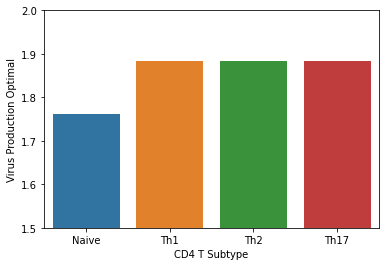

In [13]:
optimal = pd.read_csv('Result/optimal_fluxes.csv', index_col=0)
sns.barplot(data=optimal, x='CD4 T Subtype', y='Virus Production Optimal')
plt.ylim(1.5,2)
plt.savefig('Virus_optima_4_type.pdf', dpi=300)

Hits

<Figure size 4800x2700 with 0 Axes>

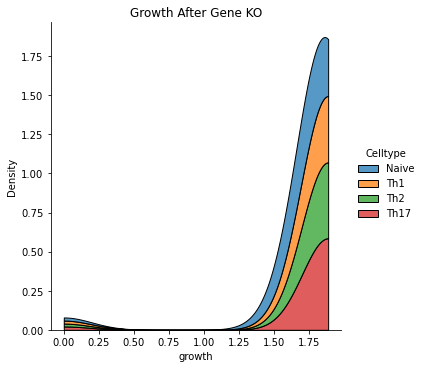

In [45]:
aggregate_result = pd.concat([Naive_gene,Th1_gene,Th2_gene, Th17_gene], axis=0)
aggregate_result['Celltype'] = ['Naive']*len(Naive_gene.index) + ['Th1']*len(Th1_gene.index) + ['Th2']*len(Th2_gene.index) + ['Th17']*len(Th17_gene.index)
plt.figure(dpi=300, figsize=(16,9))
sns.displot(aggregate_result, x='growth', hue='Celltype', kind='kde', multiple='stack', bw_adjust=2, cut=0)
plt.title('Growth After Gene KO')
plt.savefig('Result/Growth_After_Gene_KO.pdf', bbox_inches='tight')

<Figure size 4800x2700 with 0 Axes>

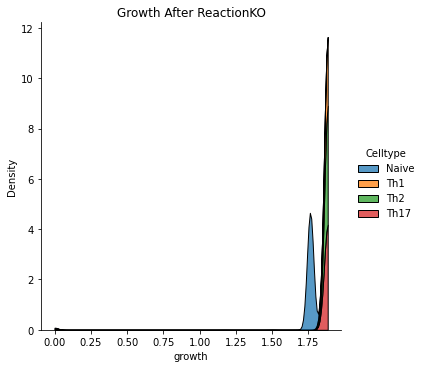

In [46]:
aggregate_result = pd.concat([Naive_reaction,Th1_reaction,Th2_reaction, Th17_reaction], axis=0)
aggregate_result['Celltype'] = ['Naive']*len(Naive_reaction.index) + ['Th1']*len(Th1_reaction.index) + ['Th2']*len(Th2_reaction.index) + ['Th17']*len(Th17_reaction.index)
plt.figure(dpi=300, figsize=(16,9))
bax = plt.broken_barh
sns.displot(aggregate_result, x='growth', hue='Celltype',kind='kde', multiple='stack', cut=0)
plt.title('Growth After ReactionKO')
plt.savefig('Result/Growth_After_Reaction_KO.pdf', bbox_inches='tight')

In [19]:
# Traget efficiency
def EfficiencyBartplot(Naive, Th1, Th2, Th17,  threshhold, target_type):
    plot_df = pd.DataFrame.from_dict({'Naive':[len(Naive[Naive['growth']<=threshhold])],
                                      'Th1':[len(Th1[Th1['growth']<=threshhold])],
                                      'Th2':[len(Th2[Th2['growth']<=threshhold])],
                                      'Th17':[len(Th17[Th17['growth']<=threshhold])],}).T
    plot_df['Cell type'] = plot_df.index
    plot_df.columns = ['Count', 'Cell type']
    plt.title('Numbers of Target ' + target_type + ' That Restrict Viral Growth Under '+ str(threshhold))
    sns.barplot(data=plot_df, x='Cell type', y='Count', 
                palette=palettable.cartocolors.qualitative.Pastel_4.hex_colors)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

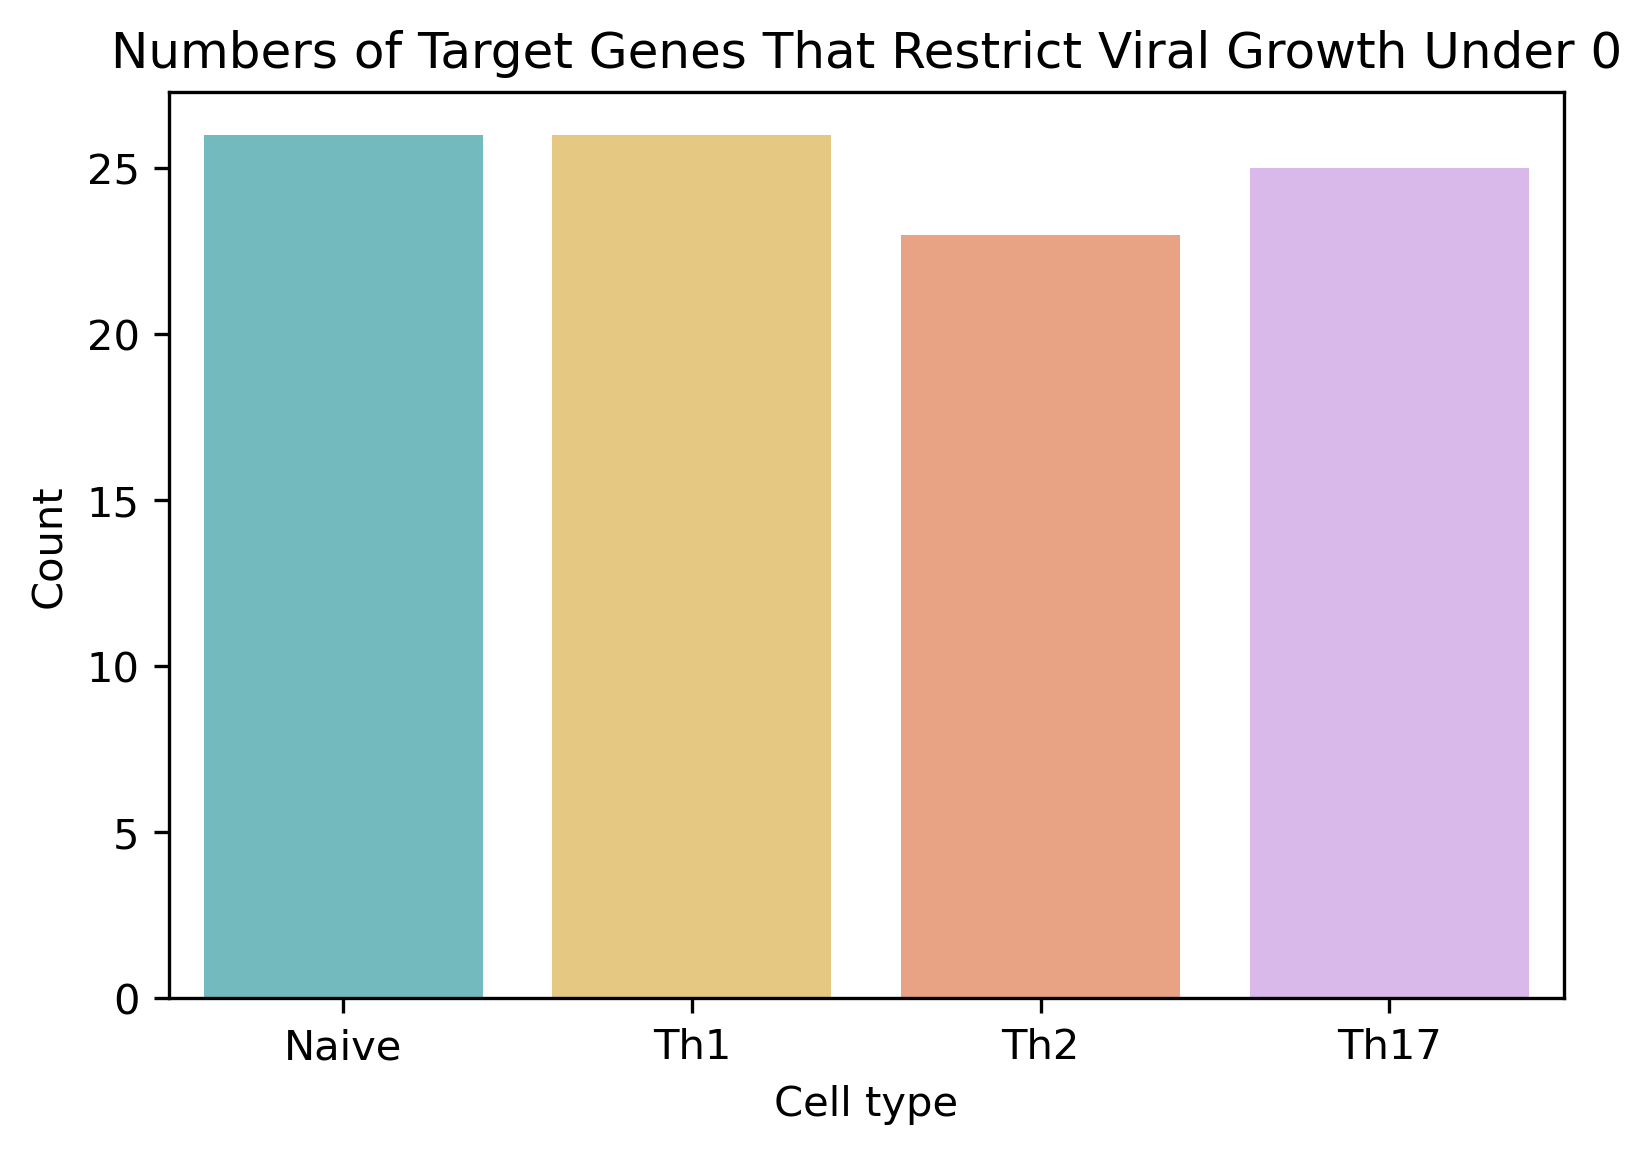

In [20]:
plt.figure(dpi=300)
EfficiencyBartplot(Naive_gene, Th1_gene, Th2_gene, Th17_gene, 0, 'Genes')

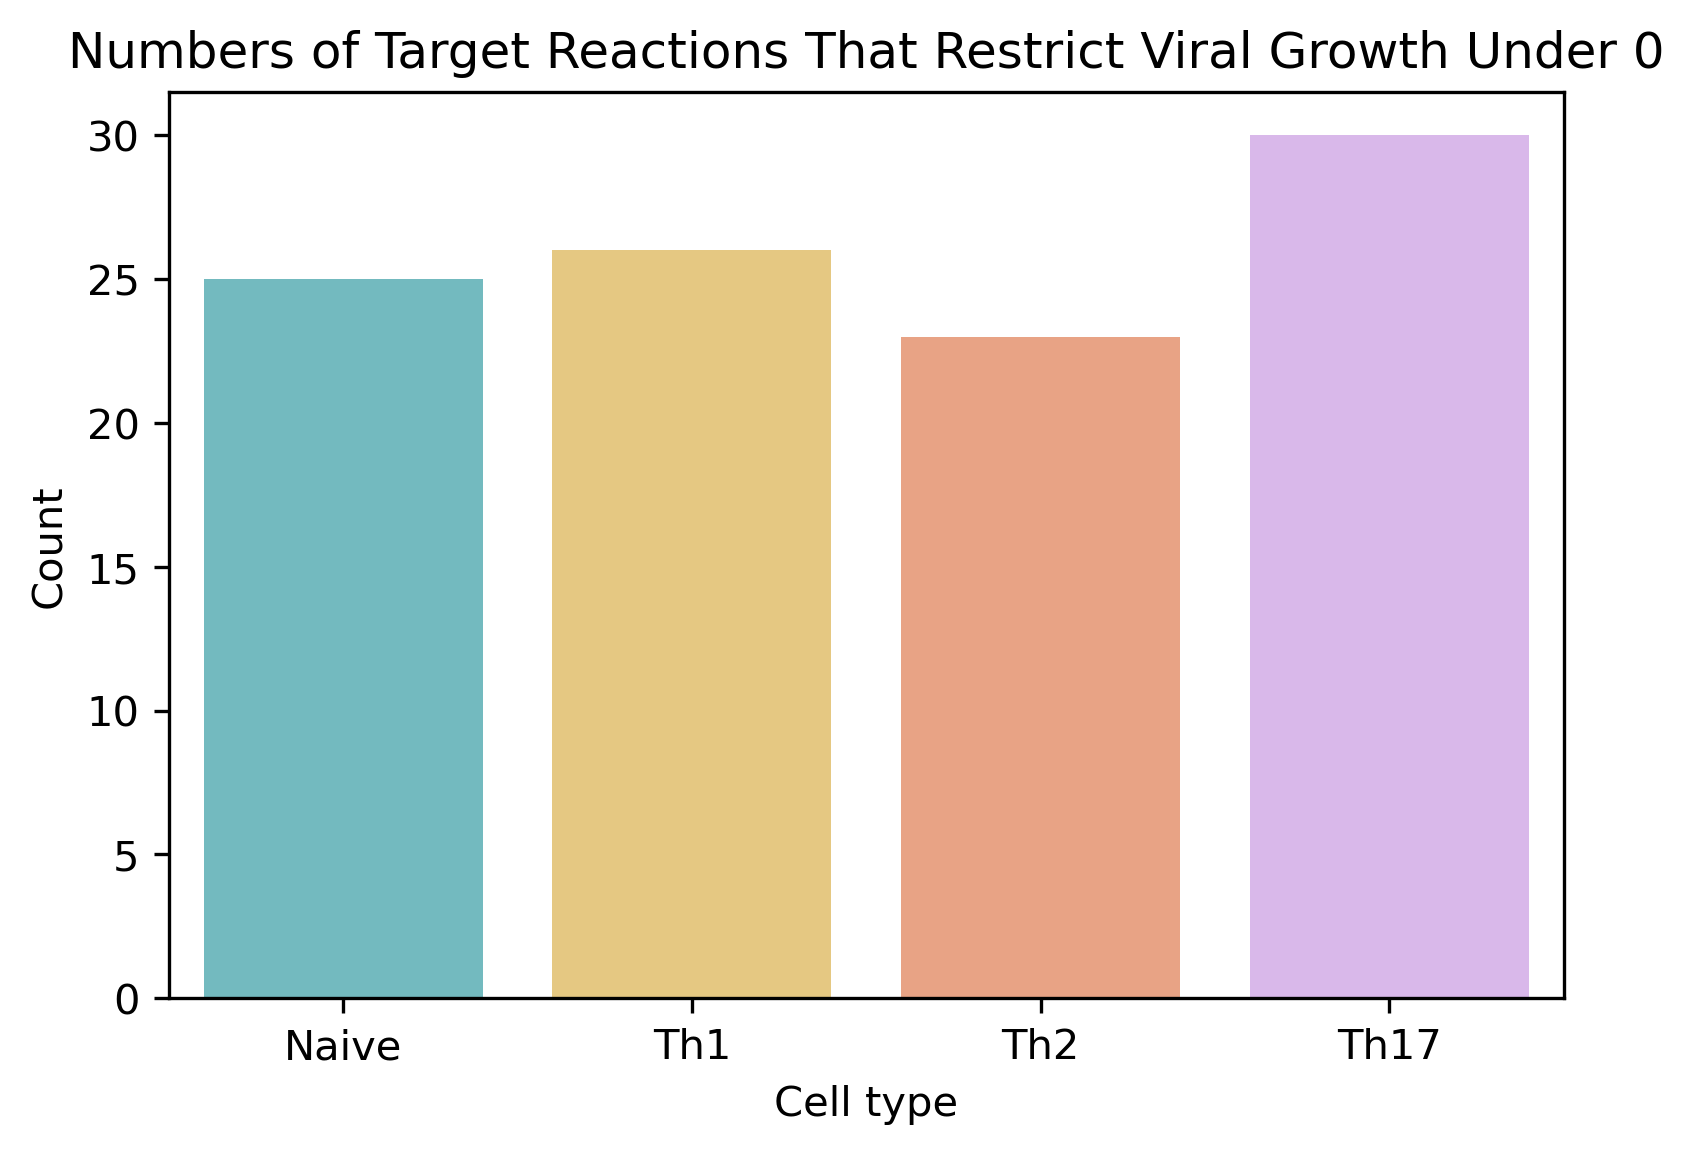

In [21]:
plt.figure(dpi=300)
EfficiencyBartplot(Naive_reaction, Th1_reaction, Th2_reaction, Th17_reaction, 0, 'Reactions')

# Venn Plot of intersections

In [22]:
def IntersectionVennPlot(Th1, Th2, Th17, Naive, threshhold):
    labels = venn.get_labels([Th1[Th1['growth']<=threshhold]['ids'].values,
                              Th2[Th2['growth']<=threshhold]['ids'].values,
                              Th17[Th17['growth']<=threshhold]['ids'].values,
                              Naive[Naive['growth']<=threshhold]['ids'].values],
                              fill=['number'])
    venn.venn4(labels, names=['Th1', 'Th2', 'Th17', "Naive"], 
               colors=palettable.cartocolors.qualitative.Pastel_4.hex_colors, fontsize=20)

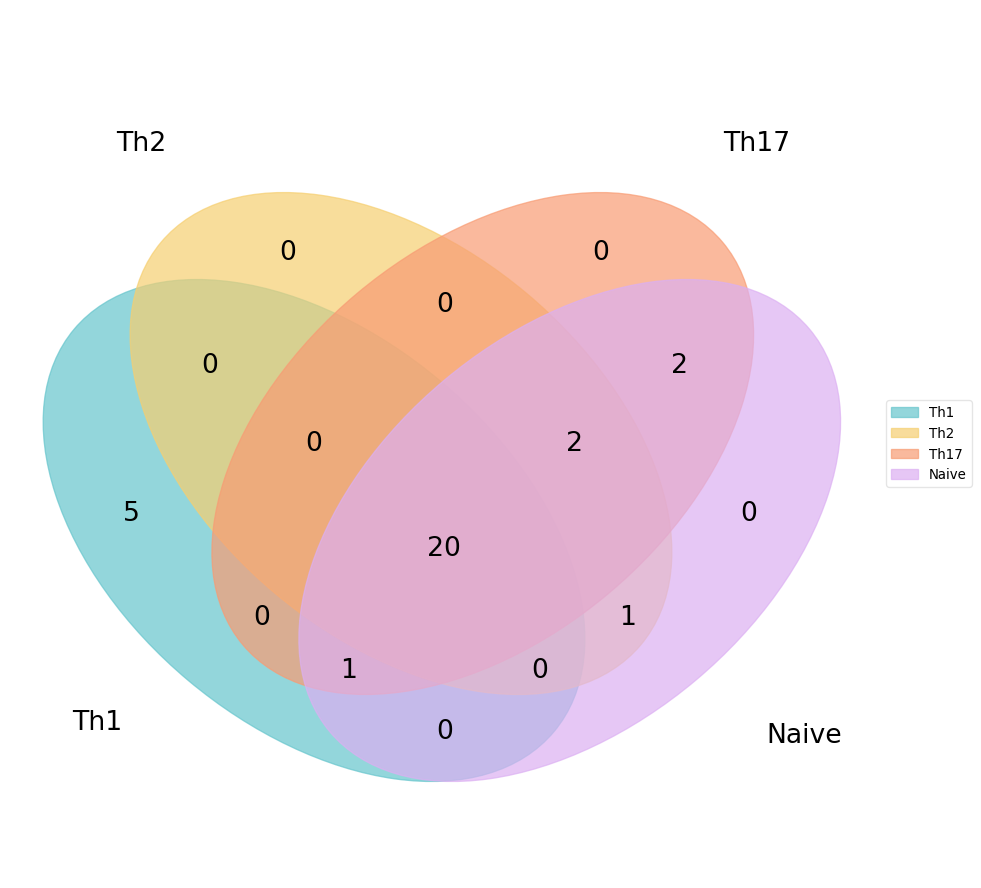

In [23]:
# Intersected Genes
IntersectionVennPlot(Th1_gene, Th2_gene, Th17_gene, Naive_gene, 0)
plt.savefig('Result/Intersected_genes.pdf', dpi=300, bbox_inches='tight')

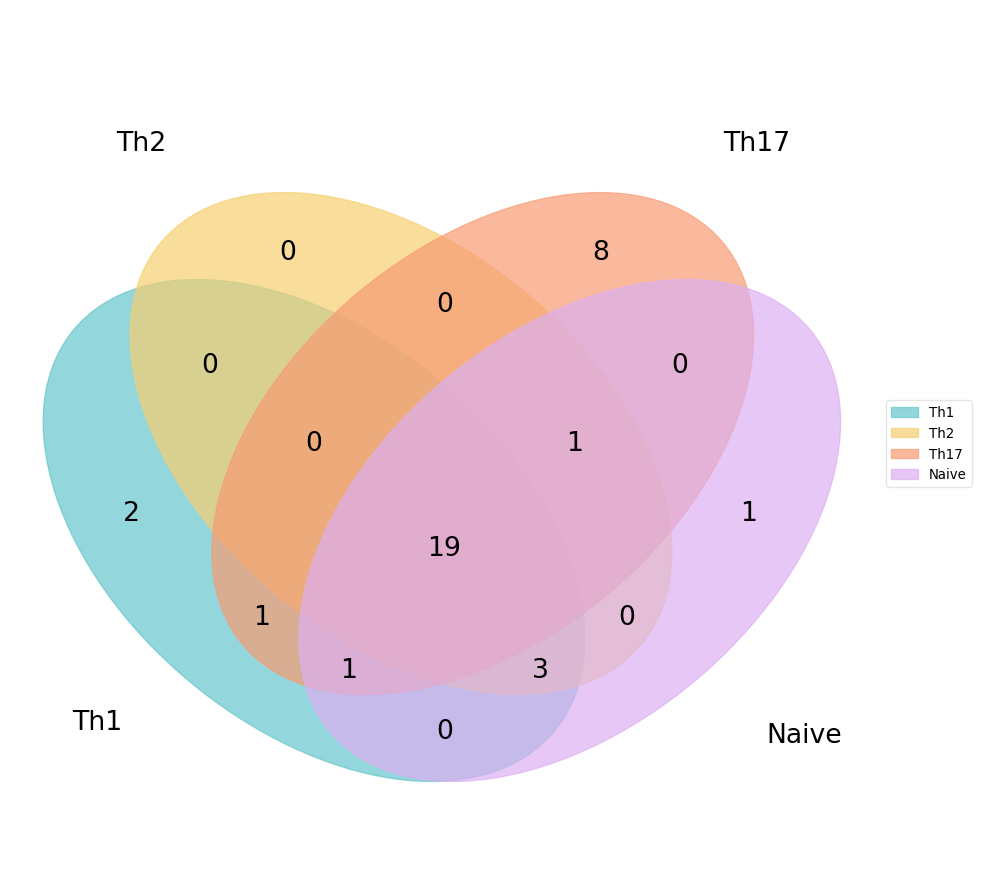

In [24]:
# Intersected reactions
IntersectionVennPlot(Th1_reaction, Th2_reaction, Th17_reaction, Naive_reaction, 0)
plt.savefig('Result/Intersected_reactions.pdf', dpi=300, bbox_inches='tight')

# Intersected altered reactions

In [38]:
def IntersectionAlterVennPlot(Th1, Th2, Th17, Naive, regulation):
    labels = venn.get_labels([Th1[Th1['Regulation']==regulation]['Reaction'].values,
                              Th2[Th2['Regulation']==regulation]['Reaction'].values,
                              Th17[Th17['Regulation']==regulation]['Reaction'].values,
                              Naive[Naive['Regulation']==regulation]['Reaction'].values],
                              fill=['number'])
    venn.venn4(labels, names=['Th1', 'Th2', 'Th17', "Naive"], 
               colors=palettable.cartocolors.qualitative.Pastel_4.hex_colors, fontsize=20)

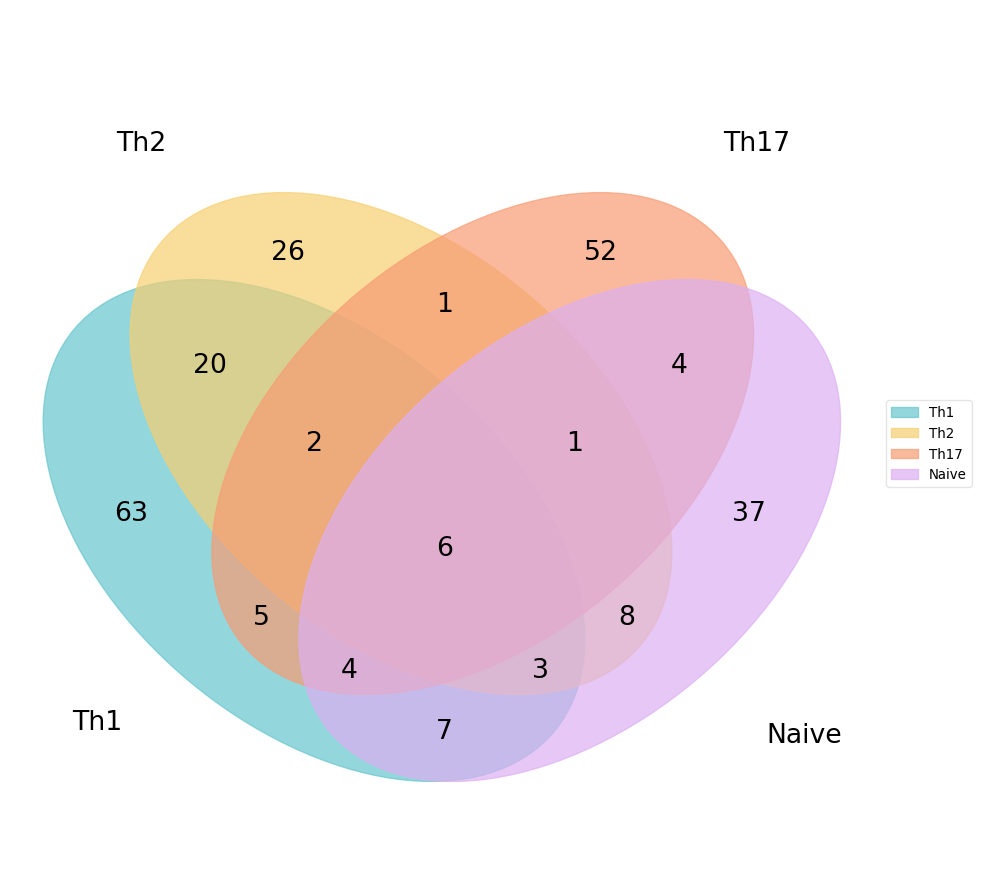

In [43]:
IntersectionAlterVennPlot(Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, Naive_altered_reaction,
                         'Upregulated')
plt.savefig('Result/Upregulated_reaction_venn.pdf', dpi=300)

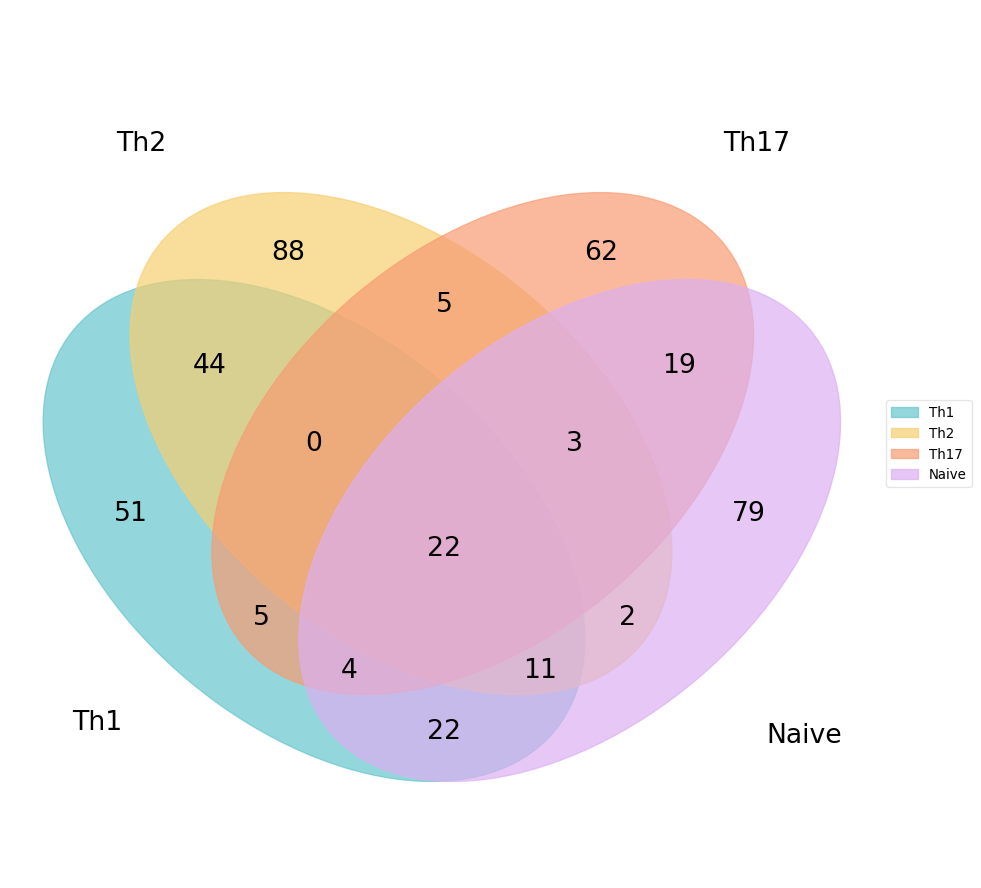

In [44]:
IntersectionAlterVennPlot(Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, Naive_altered_reaction,
                         'Downregulated')
plt.savefig('Result/Downregulated_reaction_venn.pdf', dpi=300)

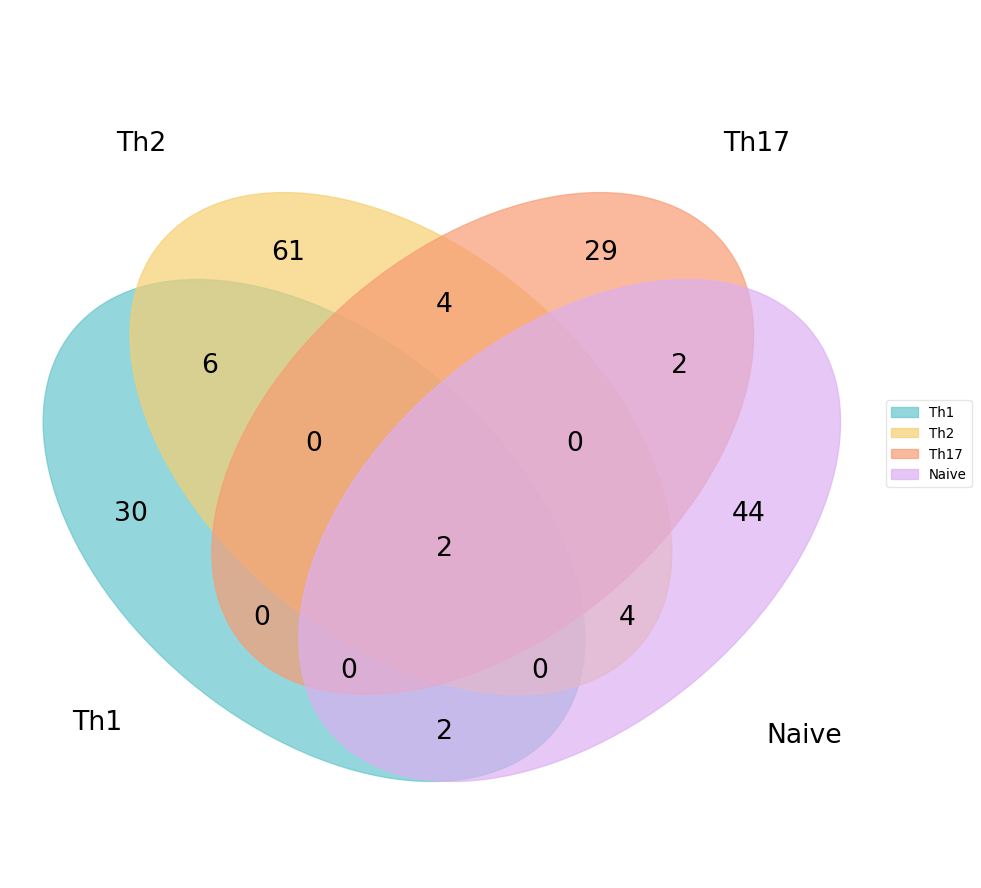

In [48]:
IntersectionAlterVennPlot(Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, Naive_altered_reaction,
                         'Activated')
plt.savefig('Result/Activated_reaction_venn.pdf', dpi=300)

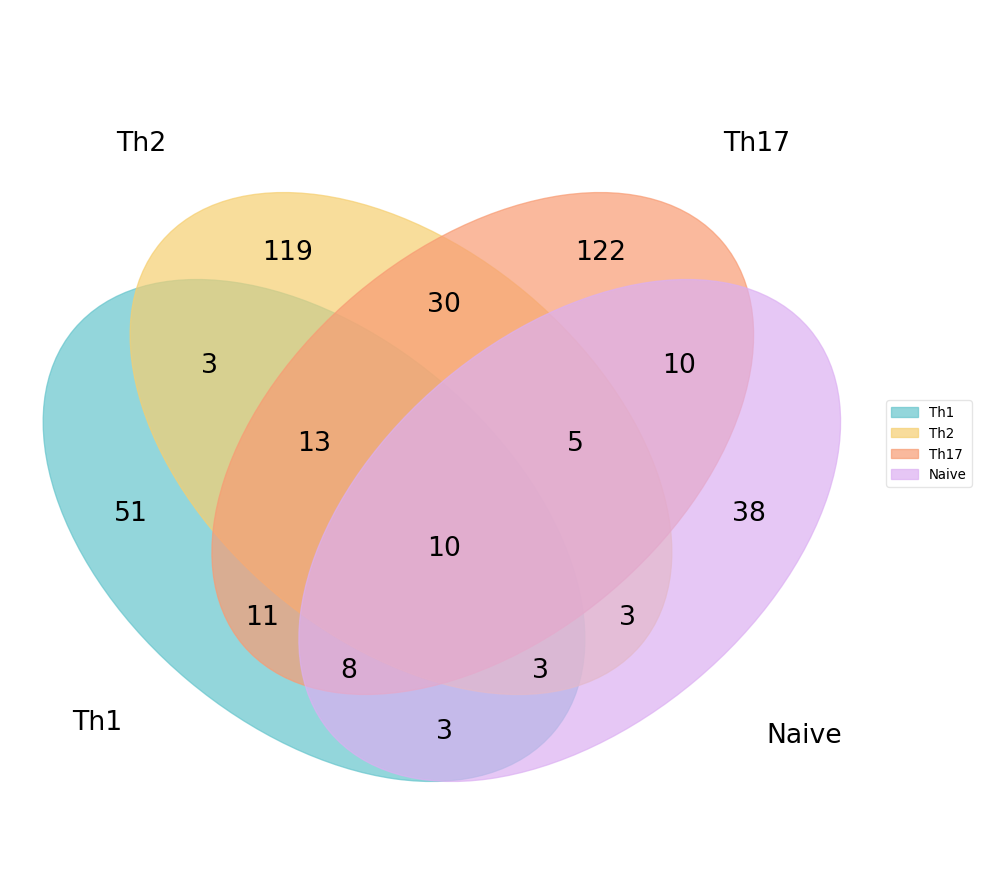

In [49]:
IntersectionAlterVennPlot(Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, Naive_altered_reaction,
                         'Inactivated')
plt.savefig('Result/Inactivated_reaction_venn.pdf', dpi=300)

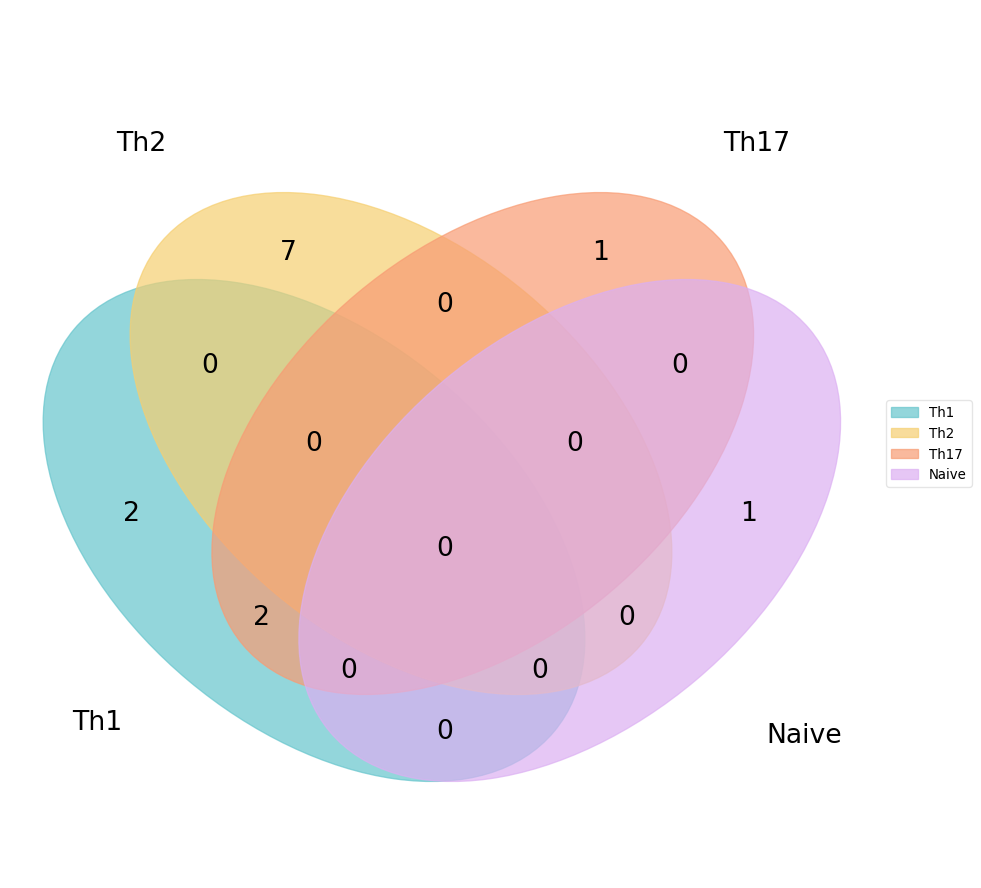

In [50]:
IntersectionAlterVennPlot(Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, Naive_altered_reaction,
                         'Reversed')
plt.savefig('Result/Reversed_reaction_venn.pdf', dpi=300)

# Intesected Targets

In [99]:
def FetchIntersection(df_list, keys, threshhold):
    df = df_list[0]
    intersected = df[df['growth']<=threshhold][keys].values
    for i  in range(1, len(df_list)):
        df = df_list[i]
        intersected = np.intersect1d(intersected, df[df['growth']<=threshhold][keys].values)
    return intersected

In [31]:
interseted_genes = FetchIntersection([Th1_gene, Th2_gene, Th17_gene, Naive_gene], 'gene symbol', 0)
pd.Series(interseted_genes).to_csv('Result/Intersected_genes.csv')

In [32]:
interseted_reactions = FetchIntersection([Th1_reaction, Th2_reaction, Th17_reaction, Naive_reaction], 'ids', 0)
pd.Series(interseted_reactions).to_csv('Result/Intersected_reactions.csv')

# Intersected Alternated reactions

In [100]:
def FetchIntersection(df_list, regulation):
    df = df_list[0]
    intersected = df[df['Regulation']==regulation]['Reaction'].values
    for i  in range(1, len(df_list)):
        df = df_list[i]
        intersected = np.intersect1d(intersected, df[df['Regulation']==regulation]['Reaction'].values)
    return intersected

In [101]:
FetchIntersection([Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, Naive_altered_reaction],
                 'Upregulated')

array(['DHORTS', 'EX_pi_e', 'EX_tyr_L_e', 'IMPC', 'LYStiDF', 'ORPT',
       'RPI'], dtype=object)

In [102]:
FetchIntersection([Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, Naive_altered_reaction],
                 'Downregulated')

array(['ADK1', 'ADSL2', 'AICART', 'AIRCr', 'ASPCTr', 'CBPS', 'DHORD9',
       'EX_ala_L_e', 'EX_ile_L_e', 'EX_lys_L_e', 'EX_pro_L_e',
       'EX_trp_L_e', 'GARFT', 'GLUPRT', 'OMPDC', 'PRAGSr', 'PRASCS',
       'PRFGS', 'PRPPS', 'r0276', 'r0666'], dtype=object)

In [103]:
FetchIntersection([Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, Naive_altered_reaction],
                 'Activated')

array(['FUMm', 'HIV-1_production'], dtype=object)

In [104]:
FetchIntersection([Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, Naive_altered_reaction],
                 'Inactivated')

array(['3DSPHR', 'AHC', 'DGAT', 'DGK1', 'DSAT', 'HMR_0197', 'METAT',
       'PSSA1_hs', 'SERPT', 'TMDS'], dtype=object)

In [105]:
FetchIntersection([Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, Naive_altered_reaction],
                 'Reversed')

array([], dtype=object)

In [107]:
with pd.ExcelWriter('Result/Intersected_alteration.xlsx') as writer:
    pd.Series(FetchIntersection([Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, 
                                 Naive_altered_reaction],
                 'Upregulated')).to_excel(writer, sheet_name='Upregualated')
    pd.Series(FetchIntersection([Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, 
                                 Naive_altered_reaction],
                 'Downregulated')).to_excel(writer, sheet_name='Downregualated')
    pd.Series(FetchIntersection([Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, 
                                 Naive_altered_reaction],
                 'Activated')).to_excel(writer, sheet_name='Activated')
    pd.Series(FetchIntersection([Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, 
                                 Naive_altered_reaction],
                 'Inactivated')).to_excel(writer, sheet_name='Inactivated')
    pd.Series(FetchIntersection([Th1_altered_reaction, Th2_altered_reaction, Th17_altered_reaction, 
                                 Naive_altered_reaction],
                 'Reversed')).to_excel(writer, sheet_name='Reversed')